In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
heart['sex'][heart['sex'] == 0] = 'female'
heart['sex'][heart['sex'] == 1] = 'male'

heart['chest_pain_type'][heart['chest_pain_type'] == 1] = 'typical angina'
heart['chest_pain_type'][heart['chest_pain_type'] == 2] = 'atypical angina'
heart['chest_pain_type'][heart['chest_pain_type'] == 3] = 'non-anginal pain'
heart['chest_pain_type'][heart['chest_pain_type'] == 4] = 'asymptomatic'

heart['fasting_blood_sugar'][heart['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart['fasting_blood_sugar'][heart['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'
heart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart['exercise_induced_angina'][heart['exercise_induced_angina'] == 0] = 'no'
heart['exercise_induced_angina'][heart['exercise_induced_angina'] == 1] = 'yes'

heart['st_slope'][heart['st_slope'] == 1] = 'upsloping'
heart['st_slope'][heart['st_slope'] == 2] = 'flat'
heart['st_slope'][heart['st_slope'] == 3] = 'downsloping'

heart['thalassemia'][heart['thalassemia'] == 1] = 'normal'
heart['thalassemia'][heart['thalassemia'] == 2] = 'fixed defect'
heart['thalassemia'][heart['thalassemia'] == 3] = 'reversable defect'

<ipython-input-5-79b62551e22c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['sex'][heart['sex'] == 0] = 'female'
<ipython-input-5-79b62551e22c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['chest_pain_type'][heart['chest_pain_type'] == 1] = 'typical angina'
<ipython-input-5-79b62551e22c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['fasting_blood_sugar'][heart['fasting_blood_sugar'] == 0] = 'lower than 120

In [6]:
heart.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [7]:
heart['sex'] = heart['sex'].astype('object')
heart['chest_pain_type'] = heart['chest_pain_type'].astype('object')
heart['fasting_blood_sugar'] = heart['fasting_blood_sugar'].astype('object')
heart['rest_ecg'] = heart['rest_ecg'].astype('object')
heart['exercise_induced_angina'] = heart['exercise_induced_angina'].astype('object')
heart['st_slope'] = heart['st_slope'].astype('object')
heart['thalassemia'] = heart['thalassemia'].astype('object')

<AxesSubplot:xlabel='age', ylabel='Count'>

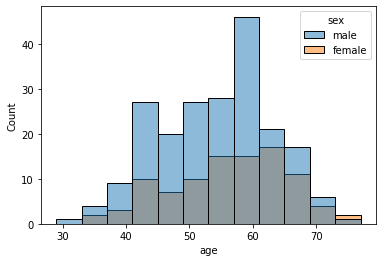

In [8]:
sns.histplot(data=heart, x="age", hue="sex")

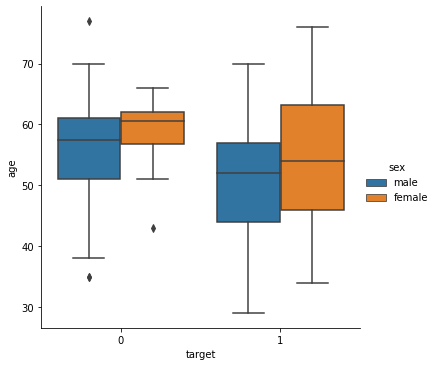

In [9]:
sns.catplot(data=heart, kind="box", x="target", y="age", hue="sex")

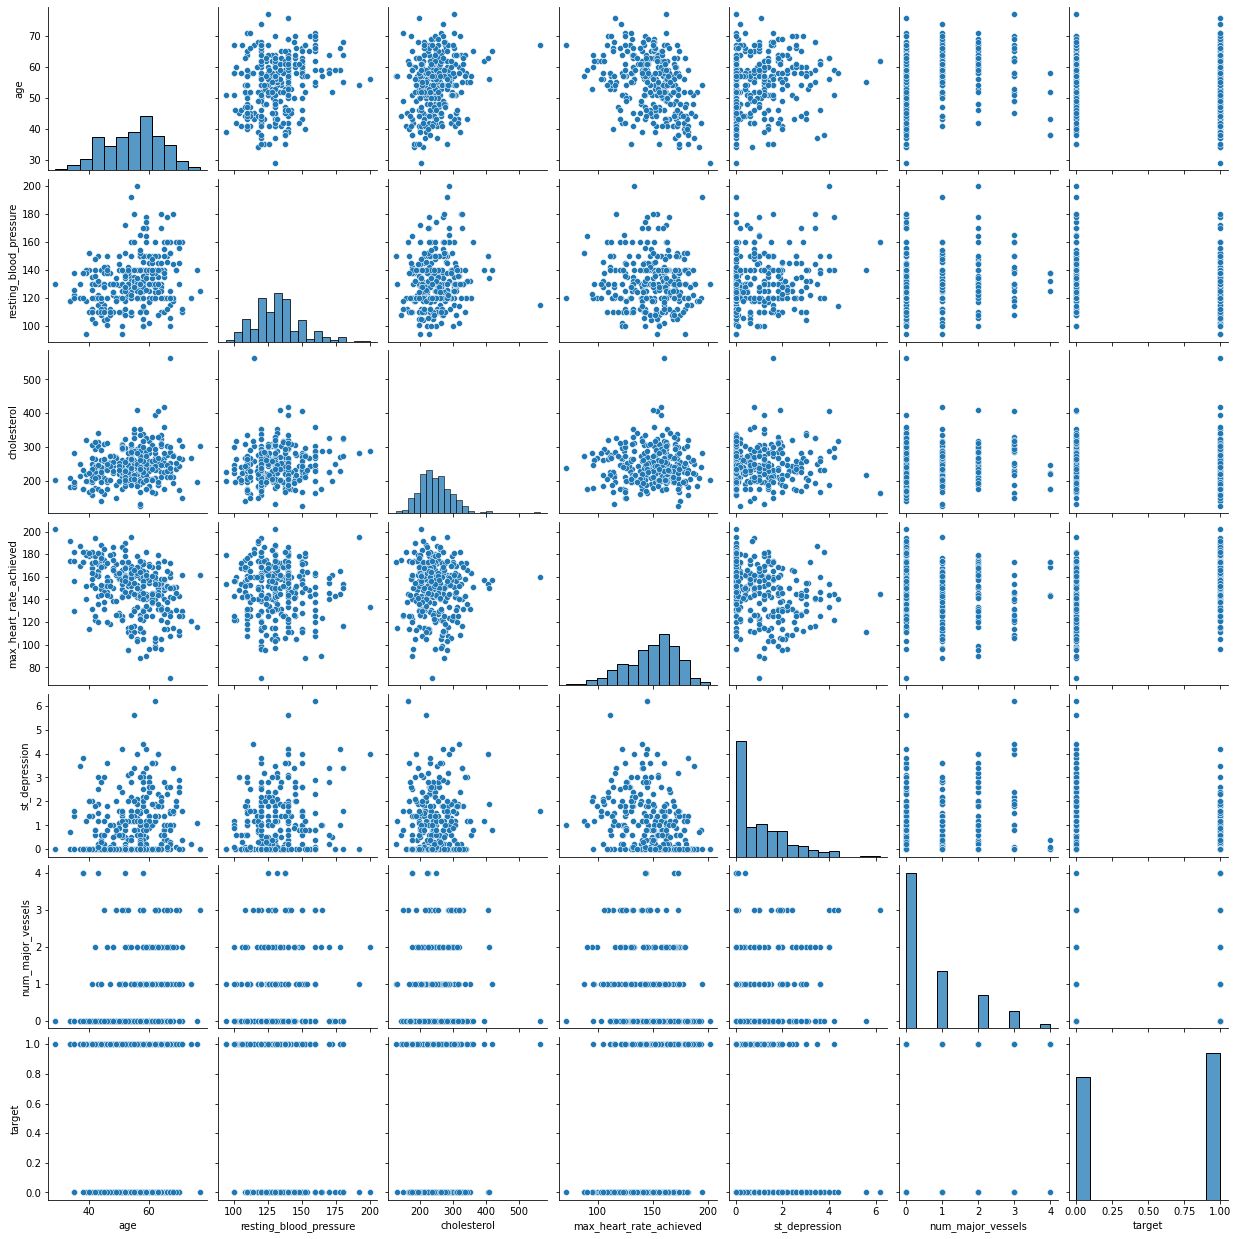

In [10]:
sns.pairplot(heart, diag_kind="hist")

<AxesSubplot:>

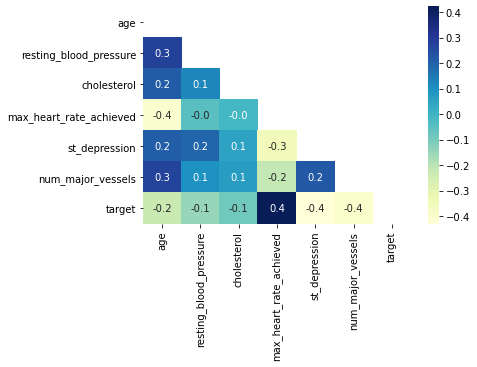

In [11]:
df_corr = heart.corr().transpose()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')

In [12]:
heart = pd.get_dummies(heart, drop_first=True)

In [13]:
heart.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In [14]:
y = heart['target']
X = heart.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [58]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(7),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),]

Nearest Neighbors Sensitivity :  0.7037037037037037
Nearest Neighbors Specificity :  0.7058823529411765
Nearest Neighbors auc:  0.7887931034482758
Decision Tree Sensitivity :  0.71875
Decision Tree Specificity :  0.7931034482758621
Decision Tree auc:  0.7909482758620691
Random Forest Sensitivity :  0.8125
Random Forest Specificity :  0.896551724137931
Random Forest auc:  0.9245689655172413
Neural Net Sensitivity :  0.8928571428571429
Neural Net Specificity :  0.8787878787878788
Neural Net auc:  0.9439655172413792
Naive Bayes Sensitivity :  0.8387096774193549
Naive Bayes Specificity :  0.9
Naive Bayes auc:  0.8997844827586207


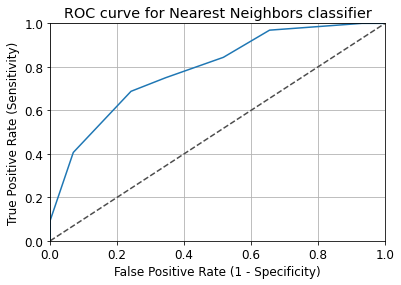

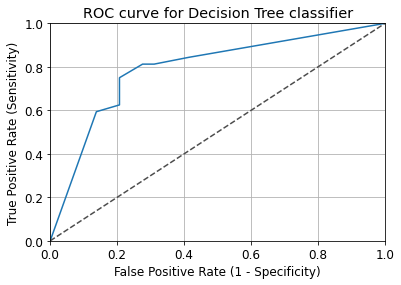

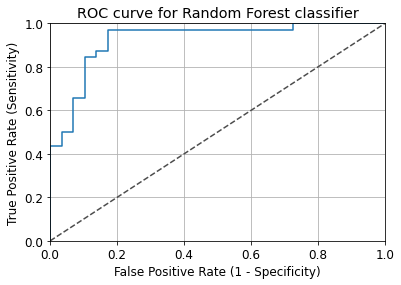

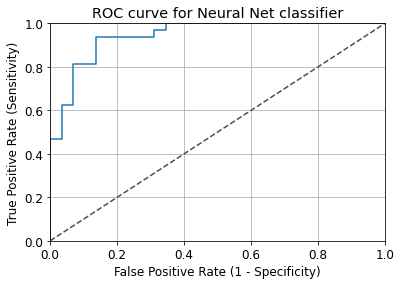

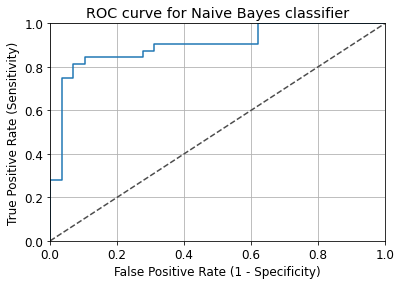

In [59]:
i = 1
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    y_predict = clf.predict(X_test)
    y_pred_quant = clf.predict_proba(X_test)[:, 1]
    y_pred_bin = clf.predict(X_test)
    
    cfm = confusion_matrix(y_test, y_pred_bin)
    cfm
    
    total=sum(sum(cfm))

    sensitivity = cfm[0,0]/(cfm[0,0]+cfm[1,0])
    print(name, 'Sensitivity : ', sensitivity )

    specificity = cfm[1,1]/(cfm[1,1]+cfm[0,1])
    print(name, 'Specificity : ', specificity)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for '+ name+ ' classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    
    print(name, 'auc: ', auc(fpr, tpr))
    
    i += 1


NN Sensitivity :  0.8181818181818182
NN Specificity :  0.9285714285714286


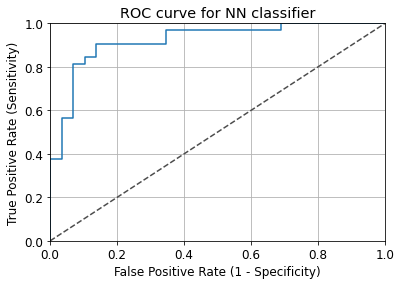

In [51]:
clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_pred_quant = clf.predict_proba(X_test)[:, 1]
y_pred_bin = clf.predict(X_test)

cfm = confusion_matrix(y_test, y_pred_bin)
cfm
    
total=sum(sum(cfm))

sensitivity = cfm[0,0]/(cfm[0,0]+cfm[1,0])
print('NN Sensitivity : ', sensitivity )

specificity = cfm[1,1]/(cfm[1,1]+cfm[0,1])
print('NN Specificity : ', specificity)
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for NN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)